In [1]:
from my_functions import*

In [2]:
file= uproot.open("/home/ruben/Escritorio/BachelorThesisRuben/Data/Muon_trees.root") #opening the Root file with Uproot 

In [ ]:
MuonTree_ZeroBias=file["MuonTree_ZeroBias;1"]
MuonTree_Zmumu=file["MuonTree_Zmumu;1"]

nmin=0
nmax=3000

ZeroBias_eta=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_eta"].array())[nmin:nmax]
ZeroBias_phi=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_phi"].array())[nmin:nmax]
ZeroBias_pt=energy_cut(MuonTree_ZeroBias["muon_pt"].array(), MuonTree_ZeroBias["muon_pt"].array())[nmin:nmax]

#Select quality 0 Z->mumu
Zmumu_pt=MuonTree_Zmumu["muon_pt"].array()[nmin:nmax]
Zmumu_eta=MuonTree_Zmumu["muon_eta"].array()[nmin:nmax]
Zmumu_phi=MuonTree_Zmumu["muon_phi"].array()[nmin:nmax]
#And select the Z peak pairsa
Zmumu_pt, Zmumu_eta, Zmumu_phi = get_all_Z_peak_pairs(Zmumu_pt,Zmumu_eta,Zmumu_phi)

energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut
energy_cut: Only 5.79% of the events have survived the cut with a lower cut of 14000 and no upper cut


100%|██████████| 5000/5000 [00:02<00:00, 2260.98it/s]


KeyboardInterrupt: 

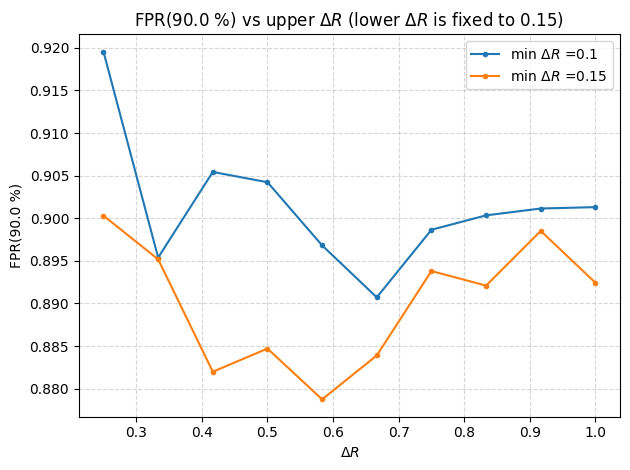

In [85]:
for i in range(3):
    target_efficiency=0.9
    bins=np.linspace(0,3,5*int(np.sqrt(nmax-nmin)))
    dr_min=np.linspace(0.1+i*0.05,0.1+i*0.05,10)
    dr_max=np.linspace(0.25,1,10)

    ROC_values, _, _ = compute_ROC_curve(MuonTree_Zmumu, MuonTree_ZeroBias, Zmumu_pt, Zmumu_eta, Zmumu_phi, ZeroBias_pt, ZeroBias_eta, ZeroBias_phi,
                            [nmin,nmax],[nmin,nmax], bins, dr_min, dr_max)
    FPR_eff=[]
    for i in range(len(dr_min)):
        FPR=ROC_values[i][0]
        TPR=ROC_values[i][1]
        FPR_eff.append(np.min(FPR[TPR >= target_efficiency]))

    plt.plot(dr_max, FPR_eff, '.-', label=fr"min $\Delta R$ ={np.round(dr_min[0],2)}")
    plt.grid(alpha=0.5, linestyle='--')
    plt.xlabel(r"$\Delta R$")
    plt.ylabel(fr"FPR({target_efficiency*100} %)")
    plt.title(fr"FPR({target_efficiency*100} %) vs upper $\Delta R$ (lower $\Delta R$ is fixed to {np.round(dr_min[0],2)})")
    plt.legend()
    plt.tight_layout()
plt.show()

In [ ]:
for i in range(3):
    target_efficiency=0.9
    bins=np.linspace(0,3,5*int(np.sqrt(nmax-nmin)))
    dr_max=np.linspace(0.4+i*0.05,0.6+i*0.05,10)
    dr_min=np.linspace(0.12,0.12,10)

    ROC_values, _, _ = compute_ROC_curve(MuonTree_Zmumu, MuonTree_ZeroBias, Zmumu_pt, Zmumu_eta, Zmumu_phi, ZeroBias_pt, ZeroBias_eta, ZeroBias_phi,
                            [nmin,nmax],[nmin,nmax], bins, dr_min, dr_max)
    FPR_eff=[]
    for i in range(len(dr_min)):
        FPR=ROC_values[i][0]
        TPR=ROC_values[i][1]
        FPR_eff.append(np.min(FPR[TPR >= target_efficiency]))

    plt.plot(dr_max, FPR_eff, '.-', label=fr"max $\Delta R$ ={np.round(dr_max[0],2)}")
    plt.grid(alpha=0.5, linestyle='--')
    plt.xlabel(r"$\Delta R$")
    plt.ylabel(fr"FPR({target_efficiency*100} %)")
    plt.title(fr"FPR({target_efficiency*100} %) vs lower $\Delta R$ (upper $\Delta R$ is fixed to {np.round(dr_max[0],2)})")
    plt.legend()
    plt.tight_layout()
plt.show()